#Jarosław Krzysztofik
##Machine Learning and Data Science post-graduate course, 2022
###Natural Language Processing class, University of Economics in Katowice



**PROBLEM:**
Create a spam classifier. Test different ML algorithms.

**DATA:** SMS Spam Collection Dataset

**SOURCE:** https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download

##Libraries

In [33]:
#Main
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

#NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Validation
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Load and transform data

In [34]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.drop(df.columns[[2, 3, 4]], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
df.replace(['ham', 'spam'],[0,1], inplace=True)
df.head(20)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [35]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

###Stopwords

In [36]:
#Remove stopwords

def text_process(text):
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

  return " ".join(text)

In [37]:
df['text'] = df['text'].apply(text_process)
df.head(20)

,label,text
0,0,Go jurong point crazy Available bugis n great ...
1,0,Ok lar Joking wif u oni
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say early hor U c already say
4,0,Nah dont think goes usf lives around though
5,1,FreeMsg Hey darling 3 weeks word back Id like ...
6,0,Even brother like speak treat like aids patent
7,0,per request Melle Melle Oru Minnaminunginte Nu...
8,1,WINNER valued network customer selected receiv...
9,1,mobile 11 months U R entitled Update latest co...


###Vectors

In [38]:
text = pd.DataFrame(df['text'])  # to be transformed into vectors
label = pd.DataFrame(df['label'])  # label, y

In [39]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['text'])  # predictors, X

##Machine Learning

In [40]:
X_train, X_test, y_train, y_test = train_test_split(vectors,
                                                    df['label'],
                                                    test_size=0.15,
                                                    random_state=111)

In [41]:
#To be used in plotting below

def plot_conf_matrix():
  sns.heatmap(cm, 
            annot=True, 
            linewidths=0.5, 
            linecolor="white",
            cbar=False,
            fmt = ".0f",
            ax=ax)
  plt.xlabel("y_pred")
  plt.ylabel("y_true")
  plt.show()

###Logistic regression

In [42]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Raport:\n", classification_report(y_test, y_pred))

Raport:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       725
           1       0.99      0.70      0.82       111

    accuracy                           0.96       836
   macro avg       0.97      0.85      0.90       836
weighted avg       0.96      0.96      0.96       836



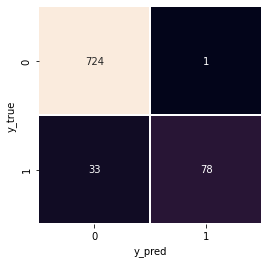

In [43]:
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (4,4))
plot_conf_matrix()

###Decision tree

In [44]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Raport:\n", classification_report(y_test, y_pred))

Raport:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       725
           1       0.84      0.83      0.84       111

    accuracy                           0.96       836
   macro avg       0.91      0.90      0.91       836
weighted avg       0.96      0.96      0.96       836



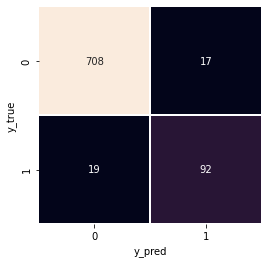

In [45]:
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (4,4))
plot_conf_matrix()

**Random forest**

In [46]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Raport:\n", classification_report(y_test, y_pred))

Raport:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       725
           1       1.00      0.84      0.91       111

    accuracy                           0.98       836
   macro avg       0.99      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836



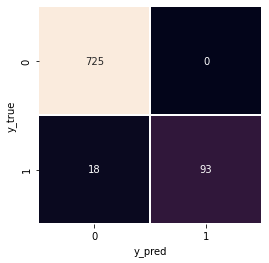

In [47]:
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize = (4,4))
plot_conf_matrix()

##Summary

**Assumption**:
Not acceptable to miss any non-spam message


**Recommended algorithm:** Random forest